In [36]:
import numpy as np
import matplotlib.pyplot as plt
import typing as T

A = np.random.rand(4, 4)
b = np.random.rand(4, 1)
x = np.linalg.solve(A, b)
A @ x - b


array([[-3.33066907e-16],
       [ 0.00000000e+00],
       [-5.55111512e-17],
       [ 2.08166817e-17]])

In [37]:
x

array([[-2.95758504],
       [-2.21956417],
       [ 0.89479933],
       [ 2.28656502]])

In [38]:
# 4x1 + 3x2 = 10
# 7x1 + x2 = 14
A = np.array([[4.1, 3*np.pi], [7, 1]])
b = np.array([[12], [14]])
print(A, "\n", b)
x = np.linalg.solve(A, b)
A @ x
x

[[4.1        9.42477796]
 [7.         1.        ]] 
 [[12]
 [14]]


array([[1.93858432],
       [0.42990979]])

In [39]:
def make_vandermonde(x):
    N = len(x)
    A = np.ones([N, 3])  # Make a matrix with N number of rows and 3 columns
    A[:,1] = x  # Second column is coefficients of x
    A[:,2] = x ** 2
    return A

In [40]:
# a0 * 1 + a1 * x + a2 * x^2 = y
N = 100
# x, y = np.random.rand(N), np.random.rand(N)
x = np.random.rand(N)  # Number of random values generated between 0-1
y = 14 + (9 * x) + (76 * x**2) + np.random.randn(N) * 0.01  # quadratic equation with added noise
A = make_vandermonde(x)
# a = np.linalg.solve(A, y)
a = np.linalg.pinv(A) @ y
np.linalg.norm(A @ a - y) / N
A

array([[1.00000000e+00, 9.27576148e-02, 8.60397510e-03],
       [1.00000000e+00, 6.60969187e-02, 4.36880266e-03],
       [1.00000000e+00, 3.49848504e-01, 1.22393976e-01],
       [1.00000000e+00, 4.34532040e-01, 1.88818094e-01],
       [1.00000000e+00, 9.17955006e-03, 8.42641392e-05],
       [1.00000000e+00, 2.22311871e-02, 4.94225681e-04],
       [1.00000000e+00, 3.03888210e-01, 9.23480444e-02],
       [1.00000000e+00, 3.89914601e-01, 1.52033396e-01],
       [1.00000000e+00, 3.31169073e-01, 1.09672955e-01],
       [1.00000000e+00, 2.86004746e-01, 8.17987149e-02],
       [1.00000000e+00, 2.87136663e-02, 8.24474634e-04],
       [1.00000000e+00, 8.79603386e-02, 7.73702117e-03],
       [1.00000000e+00, 8.36835740e-01, 7.00294056e-01],
       [1.00000000e+00, 9.41569876e-01, 8.86553832e-01],
       [1.00000000e+00, 2.13427973e-01, 4.55514997e-02],
       [1.00000000e+00, 5.45820534e-01, 2.97920055e-01],
       [1.00000000e+00, 3.30614733e-02, 1.09306102e-03],
       [1.00000000e+00, 9.05335

In [41]:
def f(x: float, c: T.Iterable, noise: float = 1) -> float:
    return c[0] + (c[1] * x) + (c[2] * x**2) + np.random.randn(len(x)) * noise  # quadratic equation with added noise

-50.0


TypeError: object of type 'numpy.float64' has no len()

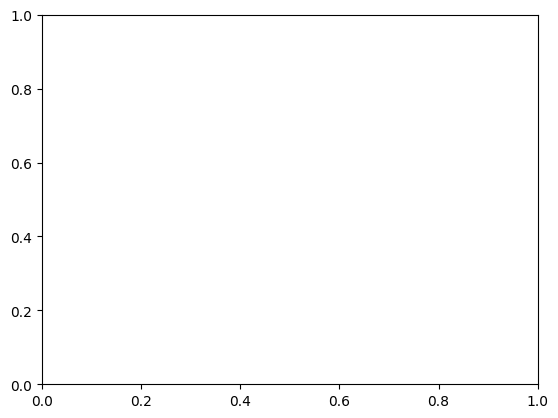

In [42]:
domain = np.linspace(-50, 50, 500)
fig, ax = plt.subplots()
print(domain[0])
for i in range(len(domain)):
    ax.scatter(domain[i], f(domain[i], (1, 1, 1), 50), s = 0.8)
# ax.set_ylim(0, 1000)
plt.show()

[ -1.0762092   26.85020875 -28.21012131]
[ -4.35480718  40.76702425 -23.03391999]
[-4.56128668 -9.97308589 40.25386356]
[20.712179754836306, 24.71858380935987, 16.26274537460129]
20.564502979599155


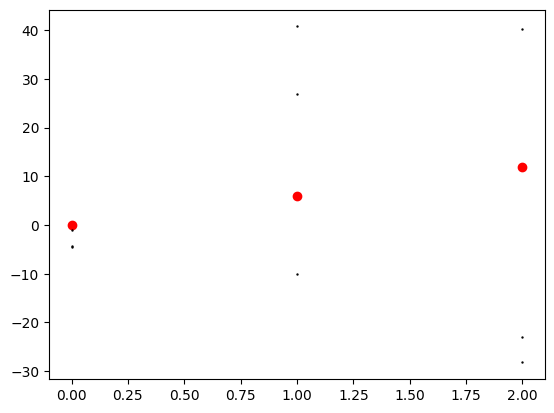

In [43]:
coeffs = (0, 6, 12)
xs = (0,1,2)
avg = []
N = 3
plt.scatter((0,1,2), coeffs, c = "r")
for i in range(3):  # each is an experiment
    diff = []  # coefficient error in this experiment
    x = np.random.rand(N)  # Number of random values generated between 0-1
    _y = f(x, coeffs, noise = 2)
    A = make_vandermonde(x)  # construct system of linear equations
    a = np.linalg.pinv(A) @ _y  # solves set of linear equations
    # print(np.linalg.norm(A @ a - _y) / N)  # avg error in function fit
    print(a)
    for i in range(3):  # calculate error for each coefficient
        plt.scatter(xs[i], a[i], c = "k", s = 0.5)
        diff.append(np.abs(coeffs[i] - a[i]))
    # print(diff)
    avg.append(np.mean(diff))  # average error per experiment
print(avg)
print(np.mean(avg))
plt.show()


[-0.03075273  6.07717369 11.97672384]
[0.04373419226915557]
0.04373419226915557


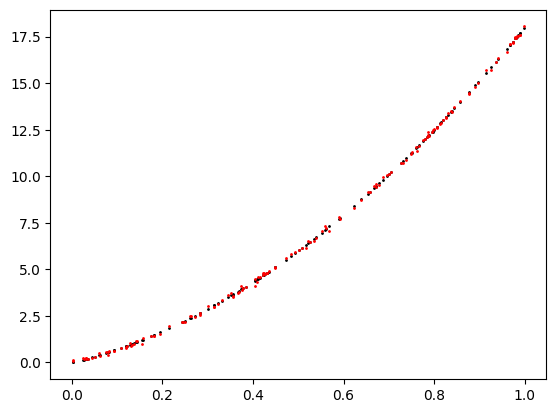

In [44]:
coeffs = (0, 6, 12)
xs = (0,1,2)
avg = []
N = 150
diff = []  # coefficient error in this experiment
x = np.random.rand(N)  # Number of random values generated between 0-1
_y = f(x, coeffs, noise = .1)
A = make_vandermonde(x)  # construct system of linear equations
a = np.linalg.pinv(A) @ _y  # solves set of linear equations
# print(np.linalg.norm(A @ a - _y) / N)  # avg error in function fit
plt.scatter(x, A @ a, c = "k", s = 1)
plt.scatter(x, _y, c = "r", s = 1)
print(a)
for i in range(3):  # calculate error for each coefficient
    diff.append(np.abs(coeffs[i] - a[i]))
# print(diff)
avg.append(np.mean(diff))  # average error per experiment
print(avg)
print(np.mean(avg))
plt.show()

Data that looks like a sine function

try fitting quadratic to that

make vandermonde can take any order approximations

In [45]:
def make_better_vandermonde(x, order: int):
    N = len(x)
    A = np.ones([N, order])  # Make a matrix with N number of rows and 3 columns
    for i in range(order):
        A[:,i] = x ** i
    # A[:,1] = x  # Second column is coefficients of x
    # A[:,2] = x ** 2
    return A

In [46]:
h = np.random.rand(100)
# make_better_vandermonde(h, 4)

In [47]:
def g(x, noise: float):
    return np.sin(np.pi * x) + np.random.randn(len(x)) * noise

0.0


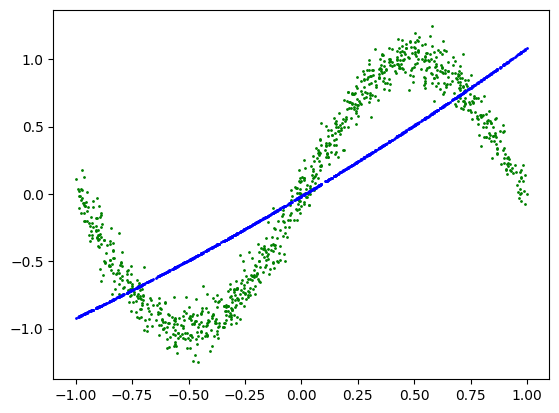

array([-0.01595886,  1.0014561 ,  0.09634014])

In [54]:
domain = np.linspace(0, 1, 500)
N= 1000
x = (np.random.rand(N) *2 -1) # Number of random values generated between 0-1
fig, ax = plt.subplots()
print(domain[0])
# for i in range(len(domain)):
#     ax.scatter(domain[i], g(domain[i], 0.1), s = 0.8, c = 'k', alpha = 0.25)
y_ = f(x, (0, 0, 2),.1)
_y = g(x, .1)

# yplot = g(domain, 0)
A = make_better_vandermonde(x, 3)  # construct system of linear equations
a = np.linalg.pinv(A) @ _y  # solves set of linear equations
plt.scatter(x, _y, c = "g", s = 1)
plt.scatter(x, A @ a, c = "b", s = 1) # prediction
# plt.plot(domain, yplot, c = "r")
# ax.set_ylim(-1.3, 1.3)
# ax.set_xlim(0, 1)
plt.show()
a

pick a function to another function of specified order, measure error, and keep measuring as order increases to create a graph
x: order, y: error

A@a is y_pred. compute np.linalg.norm(y_pred - _y) for each order

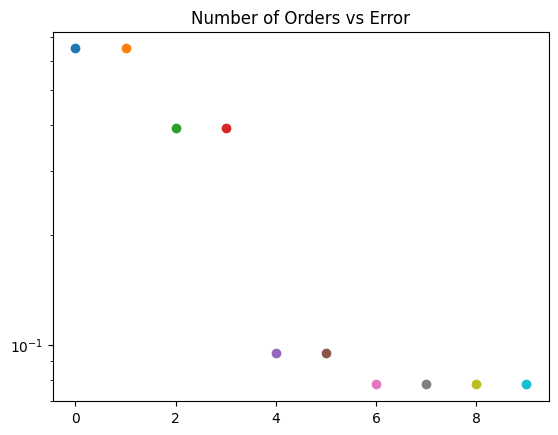

In [69]:
num_orders = 10

_y = g(x, .1)
for i in range(num_orders):
    A = make_better_vandermonde(x, i)  # construct system of linear equations
    a = np.linalg.pinv(A) @ _y
    error = np.mean(abs(_y - A @ a))
    plt.scatter(i, error)
plt.yscale("log")
plt.title("Number of Orders vs Error")
plt.show()
